In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/myexcel - myexcel.csv.csv")

In [ ]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [ ]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [ ]:
print(df.dtypes)

Name         object
Team         object
Number        int64
Position     object
Age           int64
Height       object
Weight        int64
College      object
Salary      float64
dtype: object


In [ ]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


# Preprocessing:

In [ ]:
# Height replacing it with random numbers between 150 and 180
df['Height']=np.random.randint(150,180,df['Height'].shape[0])

In [ ]:
df['Height'].head()

,Height
0,155
1,159
2,157
3,172
4,157


In [ ]:
df['Height'].tail()

,Height
453,165
454,152
455,161
456,177
457,153


In [ ]:
df.dtypes

,0
Name,object
Team,object
Number,int64
Position,object
Age,int64
Height,int64
Weight,int64
College,object
Salary,float64


In [ ]:
df['Height'].describe()

,Height
count,458.000000
mean,164.251092
std,8.624950
min,150.000000
25%,157.000000
50%,164.000000
75%,171.750000
max,179.000000


In [ ]:
#Check missing values
df.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,11


In [ ]:
#missing values by percentage
round(df.isnull().sum()/df.shape[0]*100)

,0
Name,0.0
Team,0.0
Number,0.0
Position,0.0
Age,0.0
Height,0.0
Weight,0.0
College,18.0
Salary,2.0


In [ ]:
#Find Mean and Mode
sal_mean=df.Salary.mean()
colg_mode=df.College.mode()
print("College Mode is :",colg_mode) # most repeating college
print("Salary Mean is :",sal_mean)

College Mode is : 0    Kentucky
Name: College, dtype: object
Salary Mean is : 4833969.545861297


In [ ]:
colg_mode

,College
0,Kentucky


In [ ]:
#Fill missing values with Mean and Mode
df['College'].fillna(colg_mode[0],inplace=True)
df['Salary'].fillna(sal_mean,inplace=True)

In [ ]:
#missing values by percentage After Fill
round(df.isnull().sum()/df.shape[0]*100)

,0
Name,0.0
Team,0.0
Number,0.0
Position,0.0
Age,0.0
Height,0.0
Weight,0.0
College,0.0
Salary,0.0


In [ ]:
#salary type to Int64
df['Salary']=df['Salary'].astype(int)

In [ ]:
#Check for Duplicates
df.duplicated().sum()

0

In [ ]:
#Data Range and Limits Validation , {Age,Height,Weight,Salary will not be negetive values or zero}
df[(df['Age']<=0) | (df['Height']<=0) | (df['Weight']<=0) | (df['Salary']<=0)].shape[0]

0

# Analysis Tasks:


### 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. (2 marks)

In [ ]:
df2=df['Team'].value_counts()
df2

,count
Team,
New Orleans Pelicans,19
Memphis Grizzlies,18
Utah Jazz,16
New York Knicks,16
Milwaukee Bucks,16
Brooklyn Nets,15
Portland Trail Blazers,15
Oklahoma City Thunder,15
Denver Nuggets,15


In [ ]:
round(df['Team'].value_counts()/df.shape[0]*100,2)

,count
Team,
New Orleans Pelicans,4.15
Memphis Grizzlies,3.93
Utah Jazz,3.49
New York Knicks,3.49
Milwaukee Bucks,3.49
Brooklyn Nets,3.28
Portland Trail Blazers,3.28
Oklahoma City Thunder,3.28
Denver Nuggets,3.28


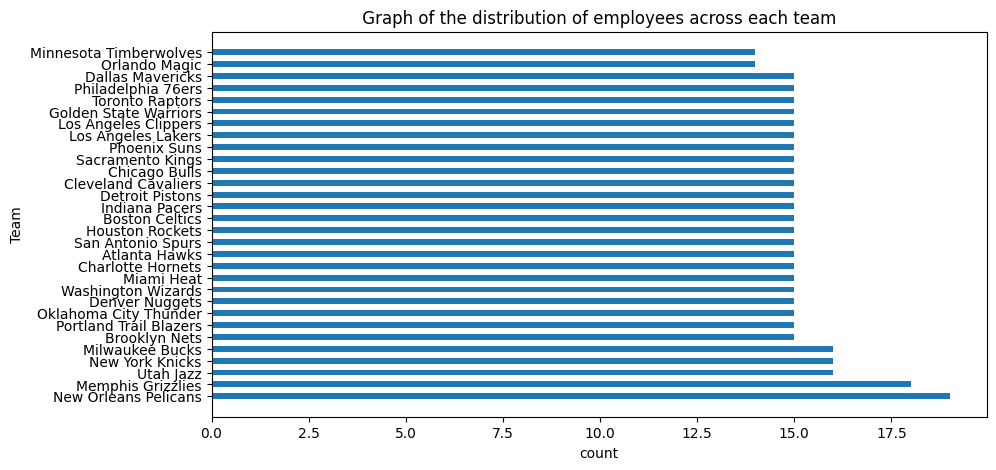

In [ ]:

x=df2.index
y=df2.values
fig = plt.figure(figsize = (10, 5))
plt.barh(x,y,height=0.5)
# Add Plot Title
plt.title(' Graph of the distribution of employees across each team ')
plt.ylabel('Team')
plt.xlabel('count')
plt.show()

*The New Orleans Pelicans have the largest number of employees (19), making up 4.15% of the total.*

*The Minnesota Timberwolves and Orlando Magic have the smallest number of employees (14), making up 3.06% of the total.*

###Segregate employees based on their positions within the company. (2 marks)

In [ ]:
df2=df['Position'].value_counts()
df2

,count
Position,
SG,102
PF,100
PG,92
SF,85
C,79


In [ ]:
round(df['Position'].value_counts()/df.shape[0]*100,2)

,count
Position,
SG,22.27
PF,21.83
PG,20.09
SF,18.56
C,17.25


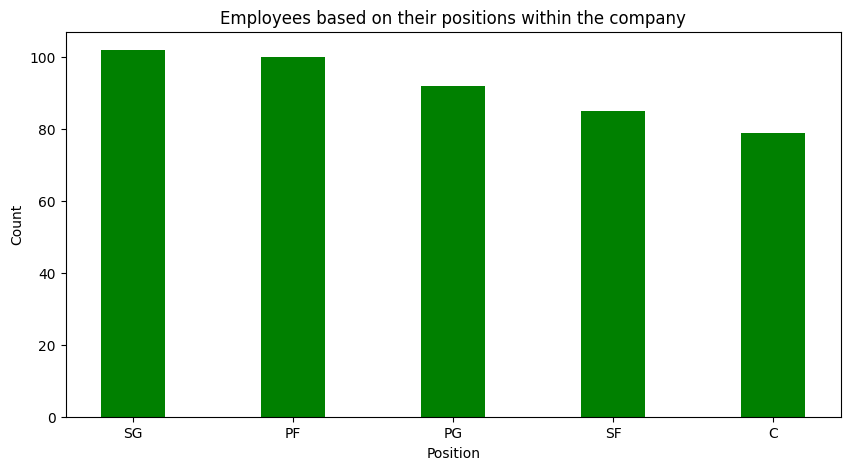

In [ ]:
x=df2.index
y=df2.values

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='green',
        width = 0.4)

plt.xlabel("Position")
plt.ylabel("Count")
plt.title("Employees based on their positions within the company")
plt.show()

Shooting Guards (SG): 102 employees (22.27%)

### 3. Identify the predominant age group among employees. (2 marks)

In [ ]:
df['Age'].value_counts()

,count
Age,
24,47
25,46
27,41
23,41
26,36
28,31
30,31
29,28
22,26


<Axes: xlabel='Age', ylabel='Count'>

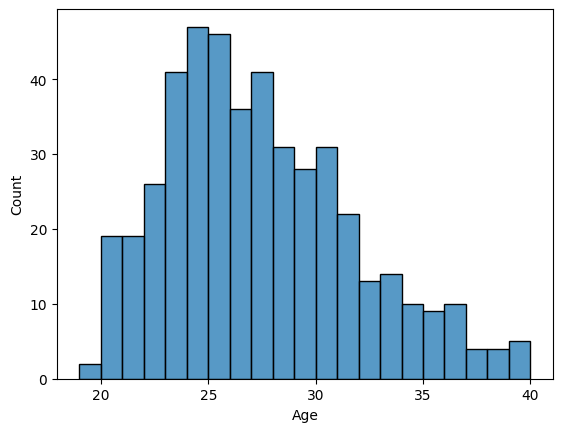

In [ ]:
sns.histplot(df['Age'],binwidth=1)

*Age 24 is the most predominant age group*

### Discover which team and position have the highest salary expenditure

In [ ]:
df2=df[['Team','Position','Salary']].sort_values(by='Salary',ascending=False)
df2

,Team,Position,Salary
109,Los Angeles Lakers,SF,25000000
169,Cleveland Cavaliers,SF,22970500
33,New York Knicks,SF,22875000
251,Houston Rockets,C,22359364
339,Miami Heat,PF,22192730
...,...,...,...
175,Cleveland Cavaliers,SG,111196
135,Phoenix Suns,C,83397
291,New Orleans Pelicans,SG,55722
130,Phoenix Suns,PG,55722


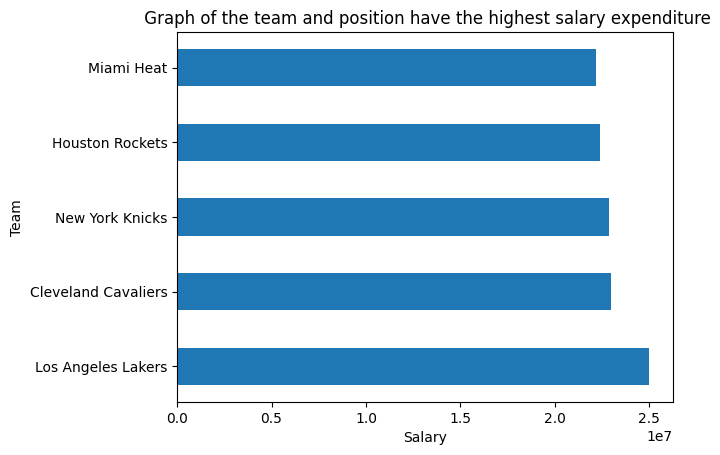

In [ ]:
x=df2['Team'].head()
y=df2['Salary'].head()
plt.barh(x,y,height=0.5)
# Add Plot Title
plt.title(' Graph of the team and position have the highest salary expenditure')
plt.ylabel('Team')
plt.xlabel('Salary')
plt.show()

*The team Los Angeles Lakers	and the position SF is highest salary expenditure*

### Investigate if there's any correlation between age and salary, and represent it visually

In [ ]:
#get numerical data from data
df2=df.select_dtypes('number')

In [ ]:
#Correlation
corr=df2.corr()
corr

,Number,Age,Height,Weight,Salary
Number,1.000000,0.027702,-0.025234,0.207459,-0.112923
Age,0.027702,1.000000,0.027245,0.086806,0.211170
Height,-0.025234,0.027245,1.000000,0.043757,-0.003236
Weight,0.207459,0.086806,0.043757,1.000000,0.134871
Salary,-0.112923,0.211170,-0.003236,0.134871,1.000000


<Axes: >

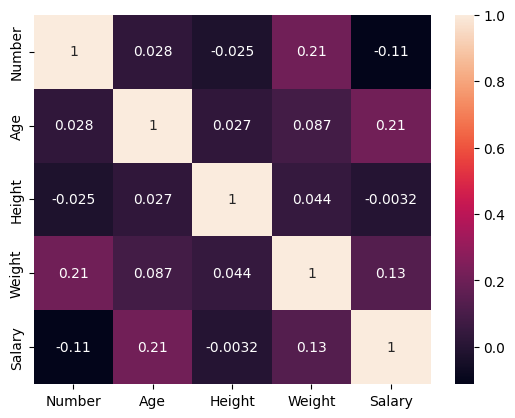

In [ ]:
sns.heatmap(corr,annot=True)

*The correlation is 0.21 of Age and Salary*